In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix


In [9]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)[['sepal length (cm)', 'petal length (cm)']]
y = (iris.target == 0).astype(int)  

Accuracy: 1.0
Confusion Matrix:
 [[20  0]
 [ 0 10]]


C:\Users\Freef\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


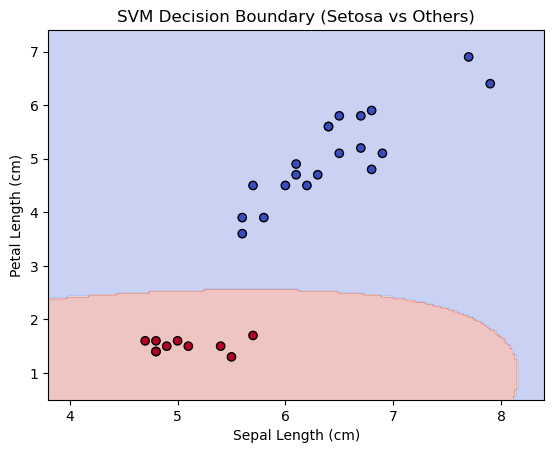

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ---- Minimal Graph: Decision Boundary ----
# Create a grid to plot decision boundary
x_min, x_max = X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5
y_min, y_max = X.iloc[:, 1].min() - 0.5, X.iloc[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, edgecolors='k', cmap='coolwarm')
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.title("SVM Decision Boundary (Setosa vs Others)")
plt.show()

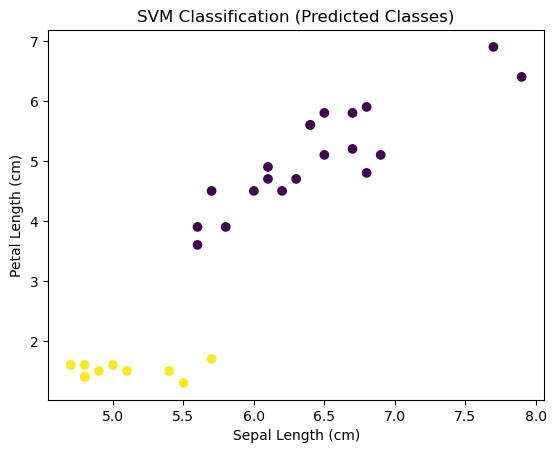

In [25]:
plt.scatter(X_test['sepal length (cm)'], X_test['petal length (cm)'],
            c=y_pred)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.title("SVM Classification (Predicted Classes)")
plt.show()